In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glob
import seaborn as sns
from PIL import Image


img = Image.open('image017.jpg')
img = np.array(img)
height = img.shape[0]
width = img.shape[1]

print(height, width)

240 201


In [58]:
for n in range(0,img.shape[0]):
    for m in range(0,img.shape[1]):
        if img[n,m] > 173:
            img[n,m] = 0
        else:
            img[n,m] = 1

(0.0, 201.0, 0.0, 240.0)

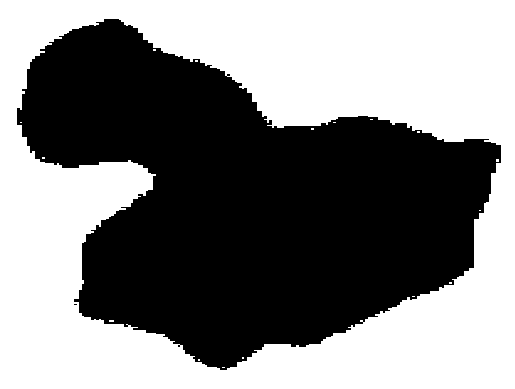

In [191]:
plt.pcolormesh(img[:,:], cmap='gray_r')
# plt.colorbar()
plt.axis('off')

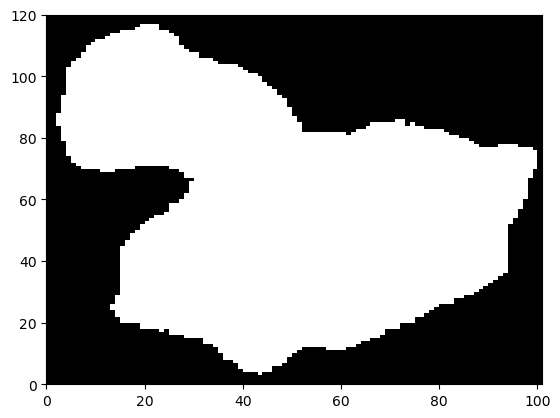

In [63]:
downsampled_image = img[::2,::2]
plt.pcolormesh(downsampled_image[:,:], cmap='gray')

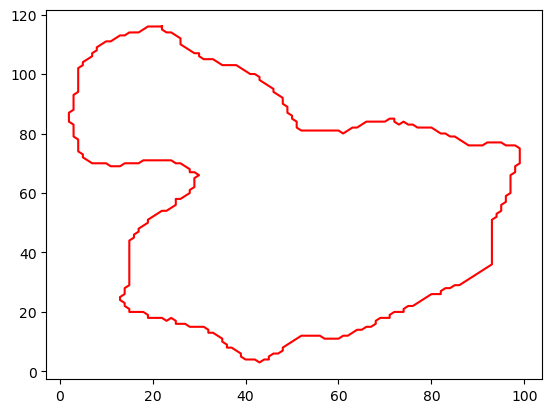

In [69]:
plt.plot(skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0][:,1], skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0][:,0], 'r')

In [67]:
edge = skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')

distance

In [3]:
for n in range(0,img.shape[0]):
    for m in range(0,img.shape[1]):
        if img[n,m] > 173:
            img[n,m] = 0
        else:
            img[n,m] = 1

In [68]:
# Calculate the gradient of the image
gradient_x, gradient_y = np.gradient(img)

# Find the edge pixels
edge_pixels = np.sqrt(gradient_x**2 + gradient_y**2) > 0

# Print the edge pixels
print(edge_pixels)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [5]:
start_point = np.where(edge_pixels == True)[0][0], np.where(edge_pixels == True)[1][0]
start_point
# adjacent_points = np.where(edge_pixels[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2] == True)
# adjacent_points


(5, 85)

In [6]:
nonzero_indices = np.nonzero(img)

# Calculate the centroid coordinates
centroid_x = np.mean(nonzero_indices[1])
centroid_y = np.mean(nonzero_indices[0])

In [7]:
def distance(centroid, point):
    return np.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2)

coord_x, coord_y = np.where(edge_pixels)

In [8]:
# pick a random starting point
start_point = (coord_x[0], coord_y[0])
def polar_angle(x,y, centroid):
    angle = np.zeros((len(x), len(y)))
    for n in range (0, len(x)):
        for p in range (0, len(y)):
            angle[n,p] = np.arctan2(y[p] - centroid[1], x[n] - centroid[0])
    return angle
def polar_distance(x,y, centroid):
    distances = np.zeros((len(x), len(y)))
    for n in range (0, len(x)):
        for p in range (0, len(y)):
            distances[n,p] = np.sqrt((x[n] - centroid[0])**2 + (y[p] - centroid[1])**2)
        # distances[n] = np.sqrt((point[0,n] - centroid[0])**2 + (point[1,n] - centroid[1])**2)
    return distances
angles = polar_angle(np.arange(0,img.shape[0]), np.arange(0,img.shape[1]), (centroid_x, centroid_y))
distances = polar_distance(np.arange(0,img.shape[0]), np.arange(0,img.shape[1]), (centroid_x, centroid_y))

In [70]:
nonzero_indices = np.nonzero(downsampled_image)

# Calculate the centroid coordinates
centroid_x = np.mean(nonzero_indices[1])
centroid_y = np.mean(nonzero_indices[0])

In [77]:
skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0]

array([[116.01,  22.  ],
       [116.01,  21.  ],
       [116.01,  20.  ],
       [116.01,  19.  ],
       [116.  ,  18.99],
       [115.01,  18.  ],
       [115.  ,  17.99],
       [114.01,  17.  ],
       [114.01,  16.  ],
       [114.01,  15.  ],
       [114.  ,  14.99],
       [113.01,  14.  ],
       [113.01,  13.  ],
       [113.  ,  12.99],
       [112.01,  12.  ],
       [112.  ,  11.99],
       [111.01,  11.  ],
       [111.01,  10.  ],
       [111.  ,   9.99],
       [110.01,   9.  ],
       [110.  ,   8.99],
       [109.01,   8.  ],
       [109.  ,   7.99],
       [108.  ,   7.99],
       [107.01,   7.  ],
       [107.  ,   6.99],
       [106.  ,   6.99],
       [105.01,   6.  ],
       [105.  ,   5.99],
       [104.01,   5.  ],
       [104.  ,   4.99],
       [103.  ,   4.99],
       [102.01,   4.  ],
       [102.  ,   3.99],
       [101.  ,   3.99],
       [100.  ,   3.99],
       [ 99.  ,   3.99],
       [ 98.  ,   3.99],
       [ 97.  ,   3.99],
       [ 96.  ,   3.99],


In [177]:
distance_downsample = skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0]
centroid_x = np.mean(distance_downsample[:,1])
centroid_y = np.mean(distance_downsample[:,0])
distances_downsample = np.zeros((distance_downsample.shape[0],1))
angles_downsample = np.zeros((distance_downsample.shape[0],1))
for n in range (0,distance_downsample.shape[0]):
    distances_downsample[n] = np.sqrt((distance_downsample[n,0] - centroid_x)**2 + (distance_downsample[n,1] - centroid_y)**2)
    angles_downsample[n] = np.arctan2(distance_downsample[n,1] - centroid_y, distance_downsample[n,0] - centroid_x)
    
    # angles_downsample = polar_angle(skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0][:,1], skimage.measure.find_contours(downsampled_image, 0.99, fully_connected='low', positive_orientation='low')[0][:,0], (centroid_x, centroid_y))

In [306]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

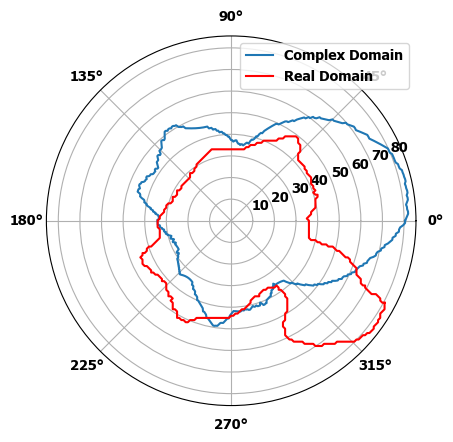

In [307]:
plt.polar(np.linspace(0,2*np.pi, len(distances_downsample)), distances_downsample, label = 'Complex Domain')
plt.polar(angles_downsample, distances_downsample, 'r', label = 'Real Domain')
plt.legend()
# plt.polar(angles_downsample, distances_downsample, 'b+')

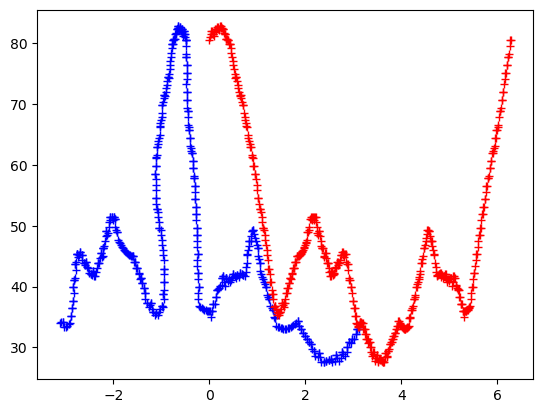

In [179]:
plt.plot(angles_downsample, distances_downsample, 'b+')
plt.plot(np.linspace(0,2*np.pi, len(distances_downsample)), distances_downsample, 'r+')

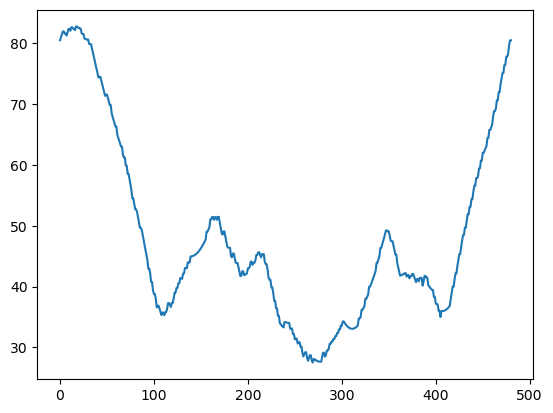

In [180]:
plt.plot(np.real(np.fft.fft(distances_downsample)))


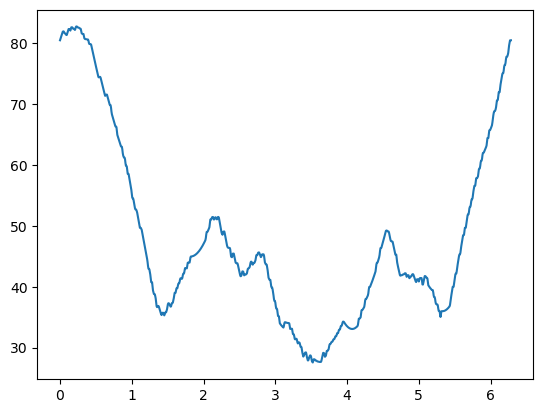

In [181]:
import scipy
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

cs = interp1d(x=np.linspace(0,2*np.pi, len(distances_downsample)), y=distances_downsample.flatten())
xs = np.linspace(0,2*np.pi, 1000)
plt.plot(xs, cs(xs))

In [164]:
print(len(np.linspace(0,2*np.pi, len(distances_downsample))), len(distances_downsample))

481 481


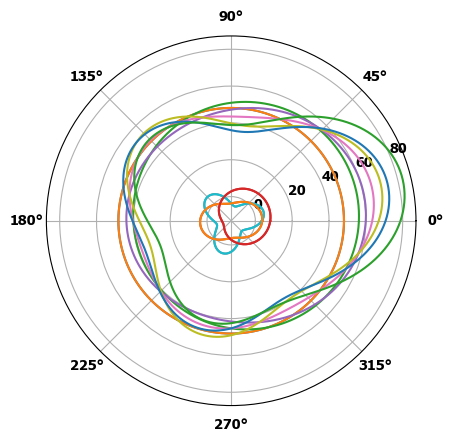

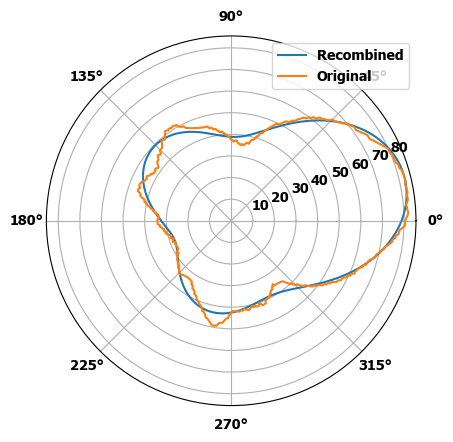

In [484]:
def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 2*np.pi, 2*np.pi / len(data))
    freqs = np.fft.fftfreq(len(x), 2*np.pi / len(x))
    recomb = np.zeros((len(x),))
    for i in range(len(fft3)):
        if abs(fft3[i]) / len(x) > threshold:
            sinewave = (
                1 
                / len(x) 
                * (
                    fft3[i].real 
                    * np.cos(freqs[i] * 2 * np.pi * x) 
                    - fft3[i].imag 
                    * np.sin(freqs[i] * 2 * np.pi * x)))
            recomb += sinewave
            plt.polar(x,recomb)
            plt.polar(x, sinewave)  # Plotting on a polar graph
    plt.show()

    plt.polar(x, recomb, label='Recombined')  # Plotting on a polar graph
    plt.polar(x, data, label='Original')
    # plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.legend()  # Adding legend
    plt.show()
    return x, recomb
    

x, recomb =decompose_fft(distances_downsample.flatten(), 1)



In [217]:
def compute_area(x, recomb):
    return np.trapz(recomb, x)

def compute_perimeter(x, recomb):
    return np.sum(np.sqrt(np.diff(recomb)**2 + np.diff(x)**2))

In [313]:
x.shape

(481,)

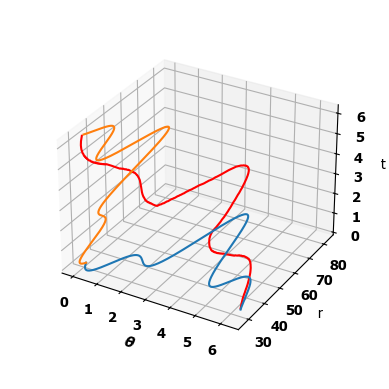

In [485]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x[:-2], recomb[order],'r', zs=(angles_downsample[order]).flatten()+np.pi, zdir='z', label='curve in (x, y)')
# ax.plot(x[:-2], recomb[order], zs=0, zdir='z', label='curve in (x, y)')
ax.plot(x[:-2], recomb[order], zs=0, zdir='z', label='curve in (x, y)')
ax.plot(recomb[order], np.linspace(0,2*np.pi, len(recomb[order])), zs=0, zdir='x', label='curve in (x, y)')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('r')
ax.set_zlabel('t')
ax.set_box_aspect(None, zoom=0.85)# ax.plot(x, recomb, zs=angles_downsample.flatten(), zdir='z', label='curve in (x, y)')
# ax.plot(x, recomb, zs=angles_downsample.flatten(), zdir='z', label='curve in (x, y)')

In [330]:
np.max(angles_downsample)

3.140127509995603

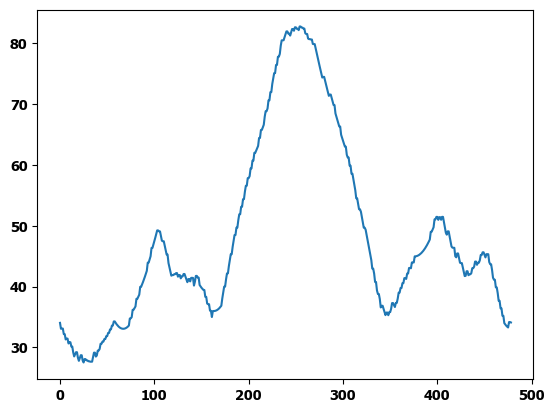

In [396]:
plt.plot(recomb[order])

In [343]:
np.trapz(recomb, x)

301.39208156964014

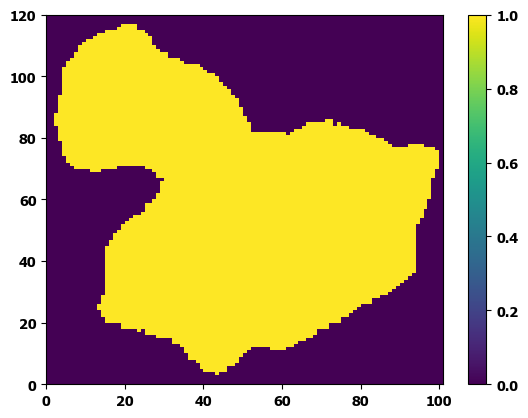

In [421]:
plt.pcolormesh(downsampled_image)
plt.colorbar()

In [418]:
area = np.sum(downsampled_image)
area

6375

In [457]:
0.5*np.trapz((recomb[order]*np.gradient(np.flip(angles_downsample[order]).flatten(), np.linspace(0,2*np.pi, len(order))[1]))**2, np.linspace(0,2*np.pi, len(recomb[order])))

9791.510125181012

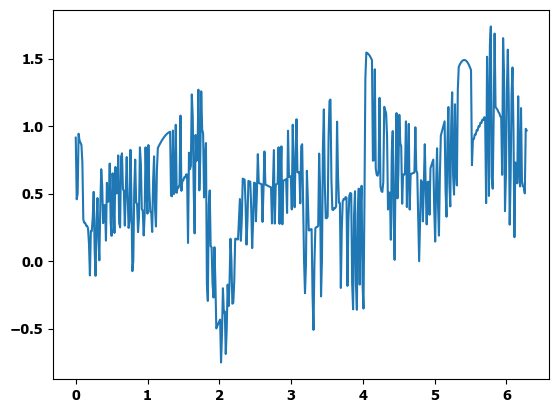

In [456]:
plt.plot(np.linspace(0,2*np.pi, len(recomb[order])), recomb[order]*np.gradient(np.flip(angles_downsample[order]).flatten()))

In [486]:
integrand = (recomb[order]*np.gradient(np.flip(angles_downsample[order]).flatten(), np.linspace(0,2*np.pi, 479)[1], edge_order=2))

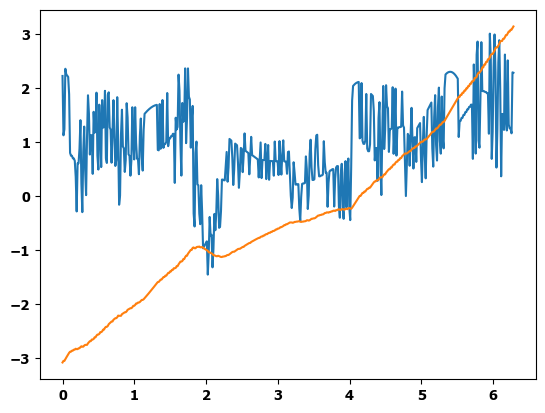

In [459]:
plt.plot(np.linspace(0,2*np.pi, 479),np.gradient(np.flip(angles_downsample[order]).flatten(), np.linspace(0,2*np.pi, 479)[1], edge_order=1))
plt.plot(np.linspace(0,2*np.pi, 479),np.flip(angles_downsample[order]))

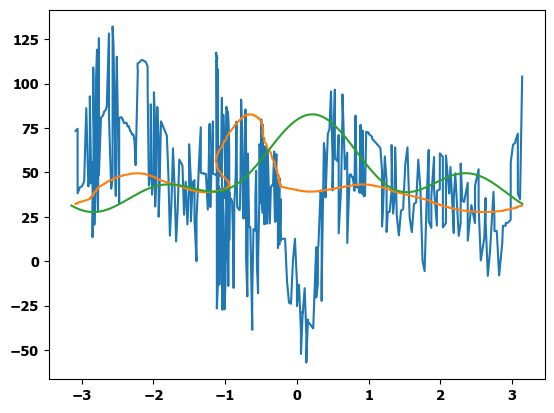

In [460]:
plt.plot(angles_downsample[order].flatten(), integrand)
plt.plot(angles_downsample[order].flatten(), recomb[order])
plt.plot(np.linspace(-np.pi,np.pi, 479), recomb[order])

In [461]:
# 0.5*np.trapz((np.flip(integrand))**2,np.linspace(0,2*np.pi, 479))
np.trapz((np.flip(integrand)),np.linspace(0,2*np.pi, 479))



280.175243676049

In [462]:
np.trapz(recomb[order], angles_downsample[order].flatten())

-267.1736435190882

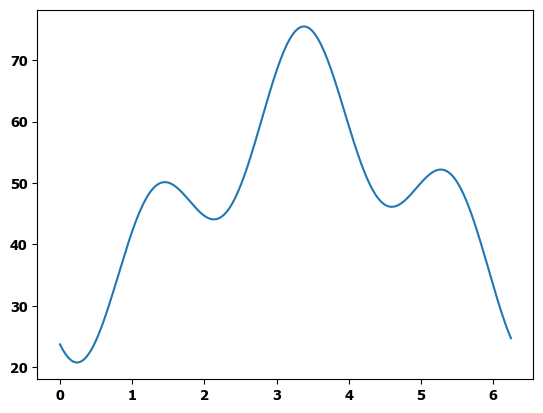

In [475]:
plt.plot(x[:-2], recomb[order])

In [464]:
np.sum(img)//4

6406.0

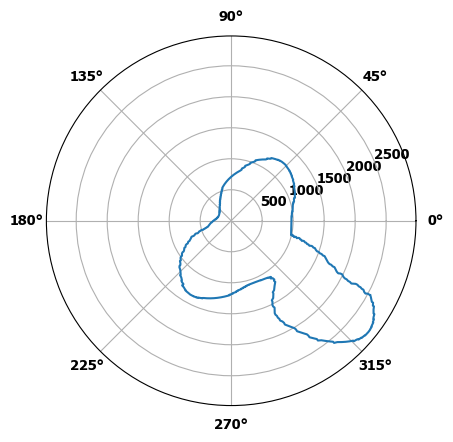

In [476]:
plt.polar((np.flip(angles_downsample).flatten()),0.5*np.flip(recomb**2))

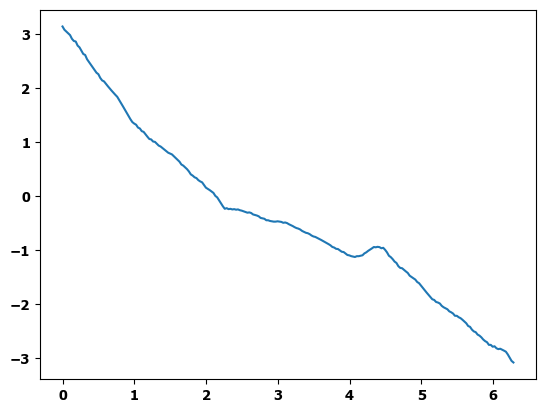

In [489]:
angles_downsample[243]
beginning = np.arange(0,242)
end = np.arange(244, len(angles_downsample))
order = np.append(end, beginning)
plt.plot( np.linspace(0,2*np.pi, len(angles_downsample[order][::2])), angles_downsample[order][::2])
# plt.plot( np.linspace(0,2*np.pi, len(angles_downsample[order][::2])), np.gradient(angles_downsample[order][::2].flatten(), np.linspace(0,2*np.pi, len(angles_downsample[order][::2]))[1], edge_order=2))



In [467]:
(np.trapz(((recomb[order][::2])**2)*np.gradient(angles_downsample[order][::2].flatten(), np.linspace(0,2*np.pi, len(angles_downsample[order][::2]))[1], edge_order=2)))

-478535.98887792777

In [468]:
print(0.5*np.trapz((np.flip(recomb)**2), np.flip(angles_downsample).flatten()), area)

3153.7388623264505 6375


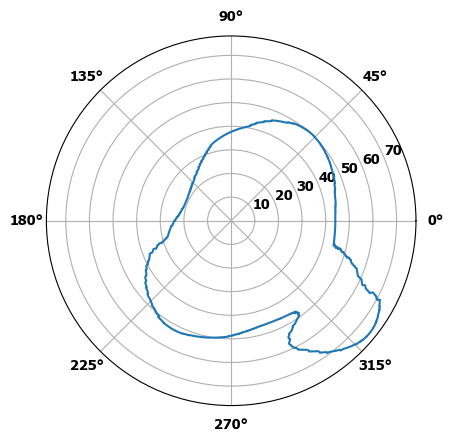

In [478]:
plt.polar(angles_downsample,recomb)

In [479]:
import scipy.integrate as spi
print(spi.cumulative_trapezoid(0.5*np.flip(recomb[order]**2), x = (np.flip(angles_downsample[order]).flatten())))

[   9.07310673    9.17446896   19.7967566    29.90159339   40.23486143
   50.78793226   61.55130088   69.56954365   69.65030956   77.6322276
   77.71271014   85.67378397   85.75412169   93.70639349   89.97532729
   90.05749213   98.20026574   98.28257637  110.89178957  118.86003418
  114.16683279  114.24950036  127.54201043  135.5309255   135.61164629
  135.80696575  155.94186478  170.53001586  185.24863948  185.47124032
  208.32255136  208.56169385  217.15926568  242.8533589   243.1215256
  270.52081546  287.92647507  288.21597941  300.06381582  330.82107087
  331.13999663  344.93557457  378.62706423  378.97526203  414.19697489
  433.62002344  433.98410373  451.53575843  489.47979839  508.98006661
  528.10875316  546.8612749   547.24673433  585.82170603  603.94524824
  621.65447985  622.04206755  643.72449449  683.15394897  677.72036609
  677.66672046  678.06077496  717.15838471  733.32927716  749.03535483
  764.28609022  764.66466614  787.81425807  825.59176563  839.55181846
  853.06

In [488]:
area

6375

In [490]:
angles_downsample[order].shape

(479, 1)

In [487]:
spi.trapezoid(0.5*np.flip(recomb[order]**2), x = (np.flip(angles_downsample[order]).flatten()))

6289.784219454877

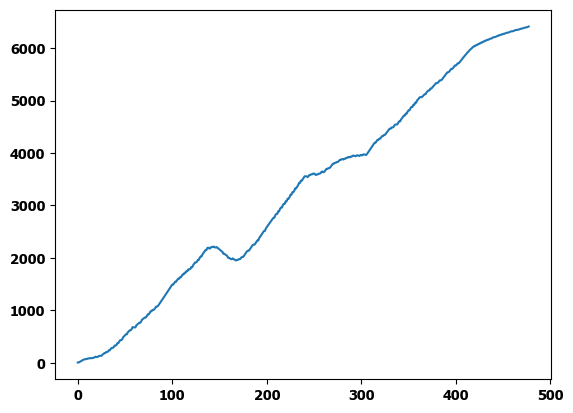

In [480]:
plt.plot(spi.cumulative_trapezoid(0.5*np.flip(recomb[order]**2), x = (np.flip(angles_downsample[order]).flatten())))

In [302]:
np.sum(downsampled_image)

6375

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

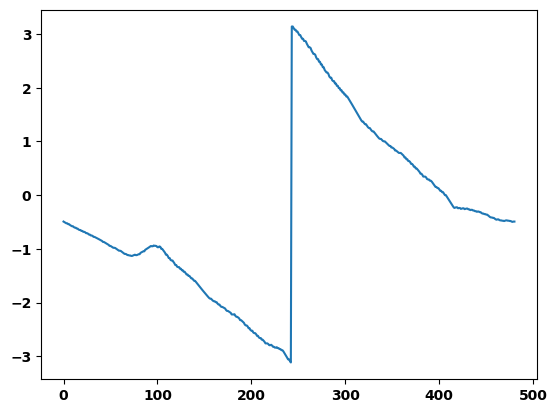

In [250]:
plt.plot(angles_downsample)

In [251]:
# print(compute_area(x, recomb), compute_perimeter(x, recomb))

np.pi*np.trapz(np.flip(recomb), np.flip(angles_downsample.flatten()))**2

11964.351238559495

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

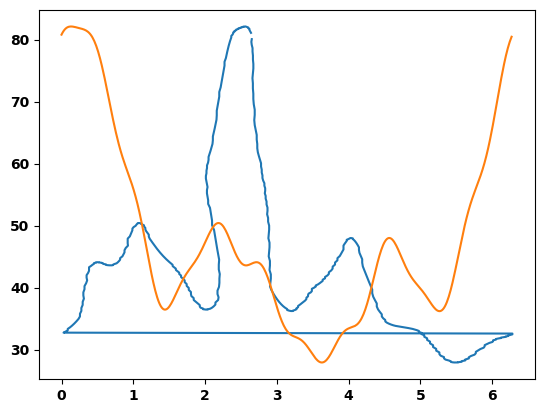

In [238]:
plt.plot(angles_downsample[1:-1].flatten()+np.pi, recomb[1:-1])
plt.plot(x, recomb)

In [234]:
print(compute_area(angles_downsample[0:-1].flatten(), recomb[0:-1]), compute_perimeter(angles_downsample[0:-1].flatten(), recomb[0:-1]))

-61.70790937493337 167.05502350450712


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

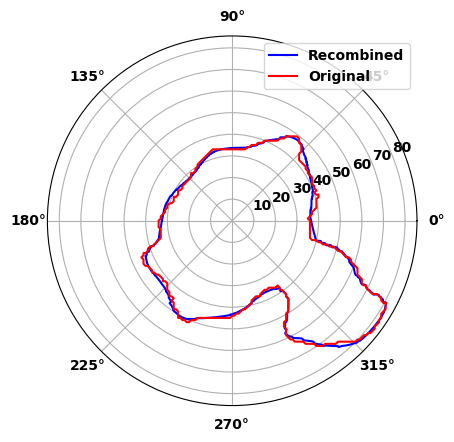

In [220]:
plt.polar(angles_downsample, recomb, 'b', label = 'Recombined')
plt.polar(angles_downsample, distances_downsample.flatten(), 'r', label = 'Original')
plt.legend()

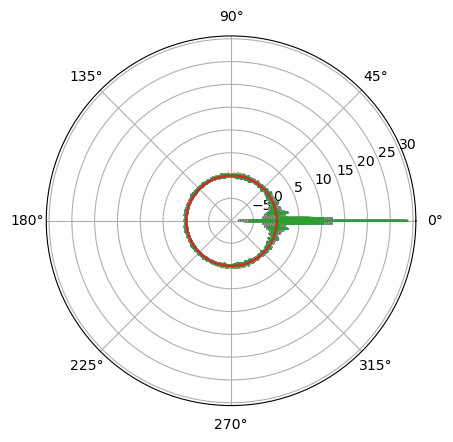

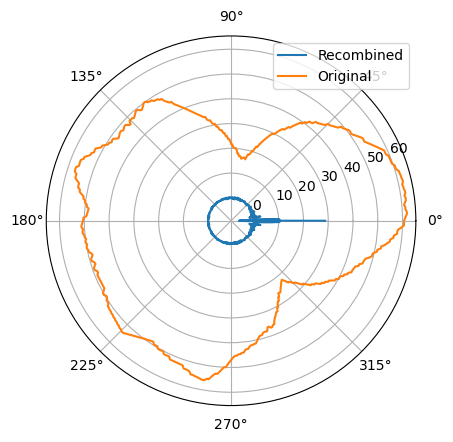

In [155]:
threshold = 0.1
data = distances_downsample
fft3 = np.fft.fft(data)
x = np.arange(0, 2*np.pi, 2*np.pi / len(data))
freqs = np.fft.fftfreq(len(x), 2*np.pi / len(x))
abs(fft3[100]) / len(x)
recomb = np.zeros((len(x),))
for i in range(len(fft3)):
    if abs(fft3[i]) / len(x) > threshold:
        sinewave = (
            1 
            / len(x) 
            * (
                fft3[i].real 
                * np.cos(freqs[i] * 2 * np.pi * x) 
                - fft3[i].imag 
                * np.sin(freqs[i] * 2 * np.pi * x)))
        recomb += sinewave
        plt.polar(x,recomb)
        plt.polar(x, sinewave)  # Plotting on a polar graph
plt.show()

plt.polar(x, recomb, label='Recombined')  # Plotting on a polar graph
plt.polar(x, data, label='Original')
# plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
plt.legend()  # Adding legend
plt.show()

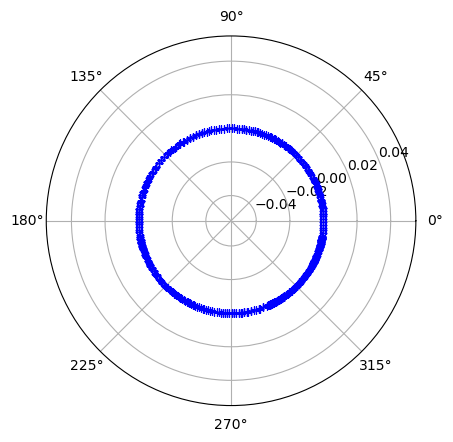

In [108]:
plt.polar(angles_downsample, recomb, 'b+')

In [9]:
start_point = (coord_x[0], coord_y[0])
adjacent_points = np.where(edge_pixels[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2] == True)
angles_local = angles[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2]
distances_local = distances[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2]
disqualified_points = np.array([start_point])


# find the point that is the most counter clockwise from the current point
new_point = np.argmax(angles_local)
new_point = (start_point[0]-1+new_point//3, start_point[1]-1+new_point%3)
disqualified_points = np.append(disqualified_points, np.array([new_point]), axis=0)
# while new_point != start_point:
#     adjacent_points = np.where(edge_pixels[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2] == True)
#     angles_local = angles[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2]
#     distances_local = distances[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2]
#     # find the point that is the most counter clockwise from the current point
#     new_point = np.argmax(angles_local)
#     new_point = (new_point//3, new_point%3)
#     disqualified_points = np.append(disqualified_points, new_point)
#     new_point
# adjacent_points

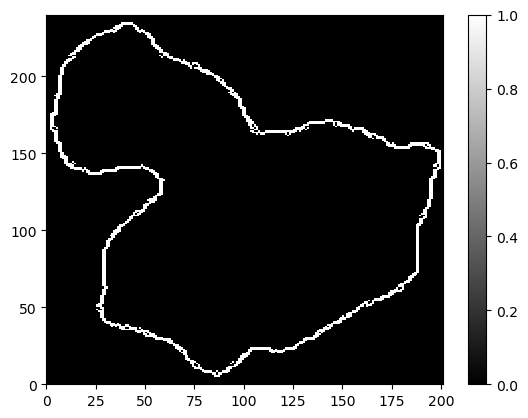

In [22]:
plt.pcolormesh(edge_pixels, cmap='gray')
plt.colorbar()

In [40]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
skimage.measure.find_contours(img, 0.1, fully_connected='low', mask=edge_pixels)

[array([[ 6.1, 84. ],
        [ 6. , 84.1]]),
 array([[ 6. , 87.9],
        [ 6.1, 88. ]]),
 array([[ 7.1, 80. ],
        [ 7.1, 81. ],
        [ 7.1, 82. ],
        [ 7.1, 83. ]]),
 array([[ 7.1, 89. ],
        [ 7.1, 90. ],
        [ 7.1, 91. ]]),
 array([[ 8. , 91.9],
        [ 9. , 91.9],
        [10. , 91.9]]),
 array([[10.1, 92. ],
        [10.1, 93. ]]),
 array([[13.9, 74. ],
        [13. , 73.1]]),
 array([[13.1, 96. ],
        [13.1, 97. ]]),
 array([[14.1, 73. ],
        [14.1, 74. ]]),
 array([[14. , 97.9],
        [15. , 97.9],
        [16. , 97.9]]),
 array([[15.1, 71. ],
        [15.1, 72. ]]),
 array([[18. , 70.1],
        [17. , 70.1],
        [16. , 70.1]]),
 array([[16.1, 98. ],
        [16.1, 99. ]]),
 array([[17. , 99.9],
        [17.9, 99. ],
        [18. , 98.9]]),
 array([[ 18.1,  99. ],
        [ 18.1, 100. ],
        [ 18.1, 101. ]]),
 array([[21. , 69.1],
        [20. , 69.1],
        [19. , 69.1]]),
 array([[ 19. , 101.9],
        [ 20. , 101.9]]),
 array([[ 

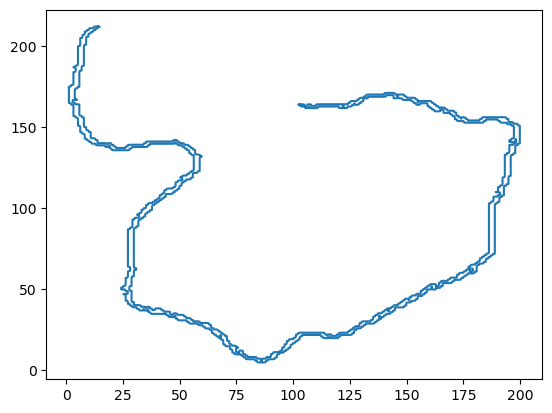

In [37]:
import skimage

plt.plot(skimage.measure.find_contours(, 0.2)[0][:,1], skimage.measure.find_contours(edge_pixels, 0.8)[0][:,0])

adjacent_points = np.where(edge_pixels[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2] == True)
print([(adjacent_points[0]+start_point[0]), adjacent_points[1]+start_point[1]], disqualified_points)


# exclusion
# np.argmax(angles_local)

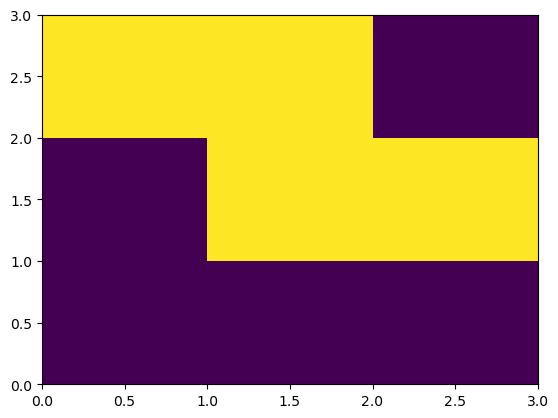

In [97]:
plt.pcolormesh(edge_pixels[start_point[0]-1:start_point[0]+2, start_point[1]-1:start_point[1]+2])

In [ ]:
def edge_tracing(edge_pixels, angles, distances, start_point):
    disqualified_points = np.array([start_point])
    new_point = start_point
    while new_point != start_point:
        adjacent_points = np.where(edge_pixels[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2] == True)
        angles_local = angles[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2]
        distances_local = distances[new_point[0]-1:new_point[0]+2, new_point[1]-1:new_point[1]+2]
        # find the point that is the most counter clockwise from the current point
        absolute_coords = np.array([new_point-1, new_point, new_point+1])
        new_point = np.argmax(angles_local)
        new_point = (new_point//3, new_point%3)
        disqualified_points = np.append(disqualified_points, new_point)
        new_point
    return disqualified_points

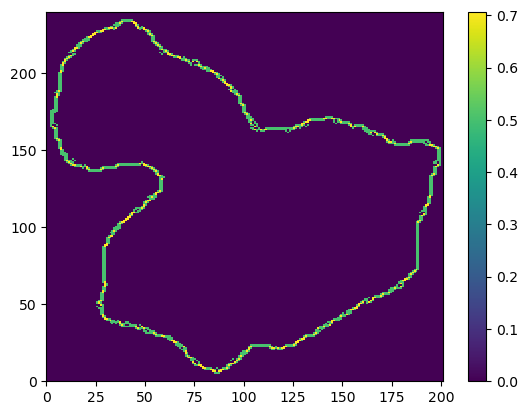

In [43]:
plt.pcolormesh(np.linalg.norm(np.gradient(img), axis = 0))
plt.colorbar()

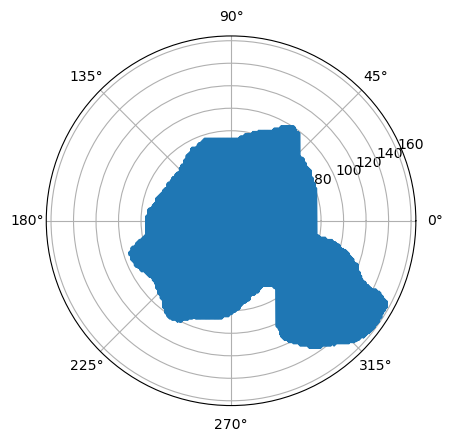

In [33]:
plt.polar(angles, distances)

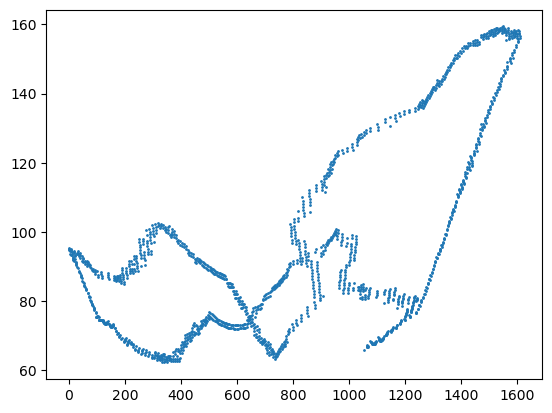

In [18]:
plt.plot(np.arange(0,len(coord_x)), distance(centroid = [centroid_x,centroid_y], point = [coord_x,coord_y]), 'o', markersize=1)

In [5]:
internal_pixels = np.where(img == 1)


In [6]:
internal_pixels

(array([  6,   6,   6, ..., 233, 233, 233]),
 array([85, 86, 87, ..., 41, 42, 43]))

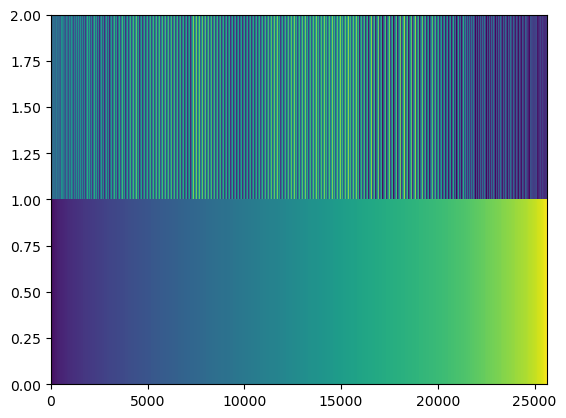

In [7]:
plt.pcolormesh(internal_pixels)

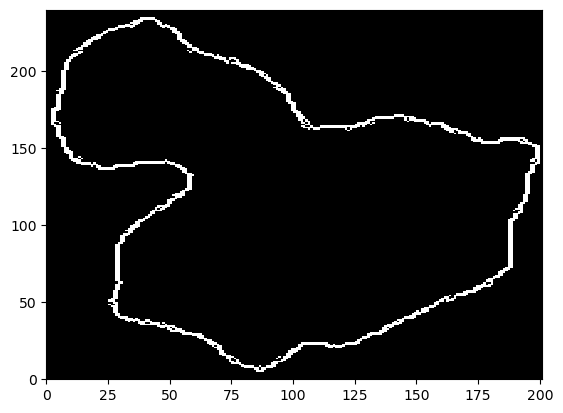

In [8]:
plt.pcolormesh(edge_pixels, cmap='gray')

In [207]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

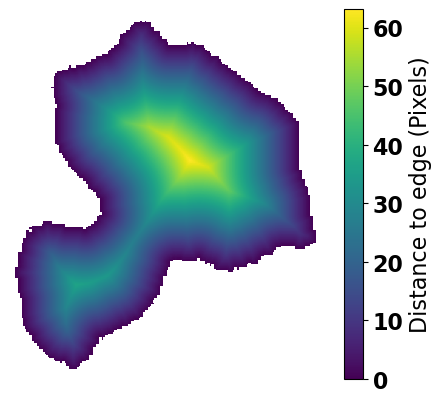

In [209]:
# Calculate the distance transform
dist_transform = distance_transform_edt(~edge_pixels)

# Assign negative distance for pixels outside the bounds of edge_pixels
for n in range(dist_transform.shape[0]):
    for m in range(dist_transform.shape[1]):
        if img[n, m]!=1:
            dist_transform[n, m] = float('nan')

# Plot the distance transform
plt.imshow(dist_transform, cmap='viridis')
plt.colorbar(label='Distance to edge (Pixels)')
# plt.title('Distance transform of edge pixels')
plt.axis('off')
# plt.clim(0, 10)
plt.show()


In [197]:
import numpy as np
from scipy.ndimage import label, maximum_position

# Label connected components in the distance_transform array
labels, num_labels = label(dist_transform)

# Find the maximum positions in each labeled region
maxima_positions = maximum_position(dist_transform, labels, np.arange(1, num_labels+1))

# Print the local maxima positions
print(maxima_positions)


NameError: name 'dist_transform' is not defined

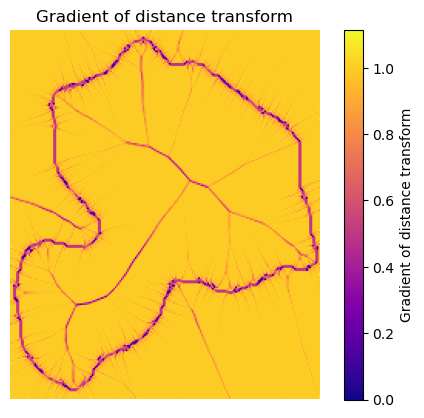

In [198]:
from scipy.ndimage import distance_transform_edt

# Calculate the distance transform
dist_transform = distance_transform_edt(~edge_pixels)

# Plot the distance transform
plt.imshow(np.linalg.norm(np.gradient(dist_transform), axis = 0), cmap='plasma')
plt.colorbar(label='Gradient of distance transform')
plt.title('Gradient of distance transform')
# plt.clim(0, 10)
plt.axis('off')
plt.show()


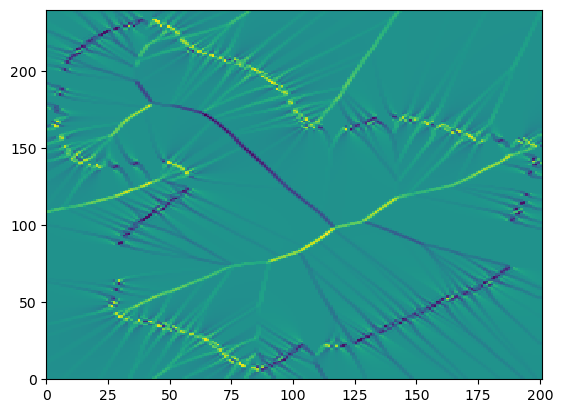

In [44]:
plt.pcolormesh(np.gradient(np.gradient(dist_transform))[1][1])

In [46]:
np.where(np.gradient(np.gradient(dist_transform))[0][0] == 0)

(array([  1,   1,   1, ..., 238, 238, 238]),
 array([ 55,  64,  65, ..., 128, 129, 130]))

In [32]:
np.min(np.linalg.norm(np.gradient(dist_transform), axis = 0))

0.0

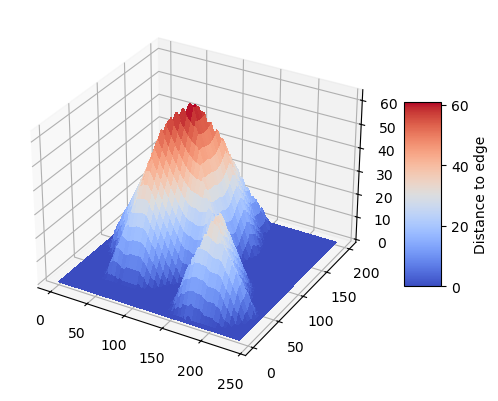

In [80]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, img.shape[1], 1)
Y = np.arange(0, img.shape[0], 1)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = (dist_transform)

# Plot the surface.
surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, label='Distance to edge')
# fig.zlabel('Distance to edge')

plt.show()

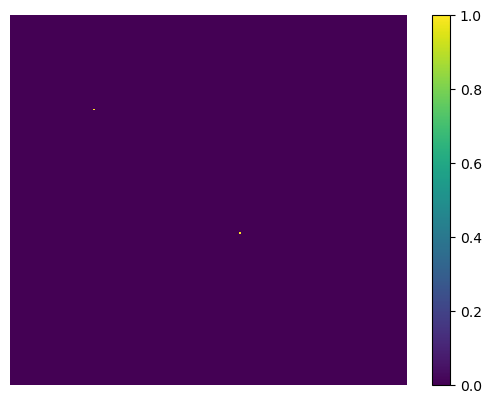

In [109]:
import scipy as sp
maxima =(dist_transform == sp.ndimage.maximum_filter(dist_transform, size=100, mode='constant', cval=0.0))
res = np.where(1==maxima)
for n in range(dist_transform.shape[0]):
    for m in range(dist_transform.shape[1]):
        if img[n, m]!=1:
            maxima[n, m] = 0

plt.pcolormesh(maxima)
plt.axis('off')
plt.colorbar()

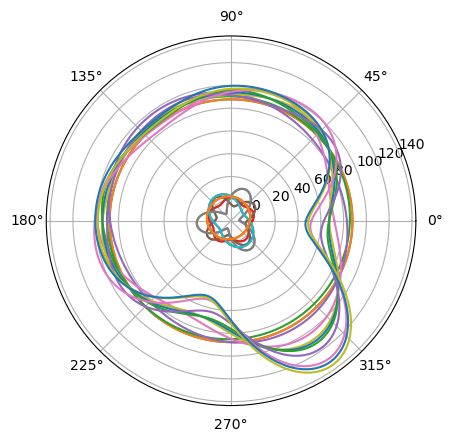

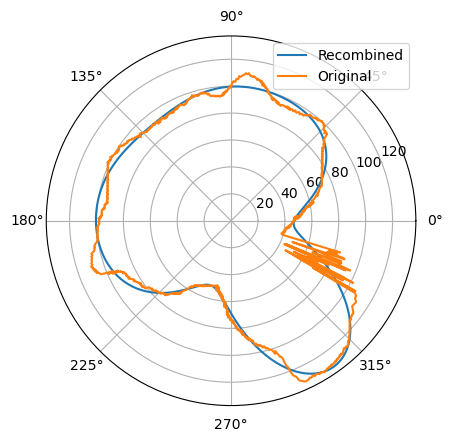

(array([0.        , 0.00628319, 0.01256637, 0.01884956, 0.02513274,
        0.03141593, 0.03769911, 0.0439823 , 0.05026548, 0.05654867,
        0.06283185, 0.06911504, 0.07539822, 0.08168141, 0.08796459,
        0.09424778, 0.10053096, 0.10681415, 0.11309734, 0.11938052,
        0.12566371, 0.13194689, 0.13823008, 0.14451326, 0.15079645,
        0.15707963, 0.16336282, 0.169646  , 0.17592919, 0.18221237,
        0.18849556, 0.19477874, 0.20106193, 0.20734512, 0.2136283 ,
        0.21991149, 0.22619467, 0.23247786, 0.23876104, 0.24504423,
        0.25132741, 0.2576106 , 0.26389378, 0.27017697, 0.27646015,
        0.28274334, 0.28902652, 0.29530971, 0.30159289, 0.30787608,
        0.31415927, 0.32044245, 0.32672564, 0.33300882, 0.33929201,
        0.34557519, 0.35185838, 0.35814156, 0.36442475, 0.37070793,
        0.37699112, 0.3832743 , 0.38955749, 0.39584067, 0.40212386,
        0.40840704, 0.41469023, 0.42097342, 0.4272566 , 0.43353979,
        0.43982297, 0.44610616, 0.45238934, 0.45

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import glob
from PIL import Image



def threshold(img, threshold):
    img = img[:,:] #only necessary if image has rgb channels
    for n in range(0,img.shape[0]):
        for m in range(0,img.shape[1]):
            if img[n,m] > threshold:
                img[n,m] = 0
            else:
                img[n,m] = 1

    return img

def centroid(img):
    # Find the non-zero indices
    nonzero_indices = np.nonzero(img)

    # Calculate the centroid coordinates
    centroid_x = np.mean(nonzero_indices[1])
    centroid_y = np.mean(nonzero_indices[0])
    return centroid_x, centroid_y

def edge_detection_distances(img, centroid_x, centroid_y):
    # Calculate the gradient of the image
    gradient_x, gradient_y = np.gradient(img)

    # Find the edge pixels
    edge_pixels = np.sqrt(gradient_x**2 + gradient_y**2) > 0

    distance = np.zeros((img.shape[0], img.shape[1]))
    for n in range (0,img.shape[0]):
        for m in range (0,img.shape[1]):
            if edge_pixels[n,m] == True:
                distance[n,m] = np.sqrt((m - centroid_x)**2 + (n - centroid_y)**2)


    return distance


def convert_to_polar(img,distance, centroid_x, centroid_y):
    angles = np.array([])
    distances = np.array([])
    for n in range (0,img.shape[0]):
        for m in range (0,img.shape[1]):
            angle = np.arctan2(n - centroid_y, m - centroid_x)
            if distance[n,m] > 0:
                angles = np.append(angles, angle)
                distances = np.append(distances, distance[n,m])

    return angles, distances

def interpolate_polar(angles, distances):
    sorted_indices = np.argsort(angles)
    sorted_angles = angles[sorted_indices]
    sorted_distances = distances[sorted_indices]
    cs = interp1d(sorted_angles, sorted_distances)
    xs = np.linspace(sorted_angles[0], sorted_angles[-1], 1000)
    return xs, cs(xs)


                



def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 2*np.pi, 2*np.pi / len(data))
    freqs = np.fft.fftfreq(len(x), 2*np.pi / len(x))
    recomb = np.zeros((len(x),))
    for i in range(len(fft3)):
        if abs(fft3[i]) / len(x) > threshold:
            sinewave = (
                1 
                / len(x) 
                * (
                    fft3[i].real 
                    * np.cos(freqs[i] * 2 * np.pi * x) 
                    - fft3[i].imag 
                    * np.sin(freqs[i] * 2 * np.pi * x)))
            recomb += sinewave
            plt.polar(x,recomb)
            plt.polar(x, sinewave)  # Plotting on a polar graph
    plt.show()

    plt.polar(x, recomb, label='Recombined')  # Plotting on a polar graph
    plt.polar(x, data, label='Original')  # Plotting on a polar graph
    plt.legend()  # Adding legend
    plt.show()
    return x, recomb
    

def master_particle_fft(img,threshold_fft, threshold_edge):
    img = threshold(img, threshold_edge)
    centroid_x, centroid_y = centroid(img)
    distance = edge_detection_distances(img, centroid_x, centroid_y)
    angles, distances_polar = convert_to_polar(img, distance, centroid_x, centroid_y)
    xs, cs = interpolate_polar(angles, distances_polar)

    return decompose_fft(cs, threshold_fft)

img = img = Image.open('image017.jpg')
img = np.array(img)
master_particle_fft(img, 2, 180)


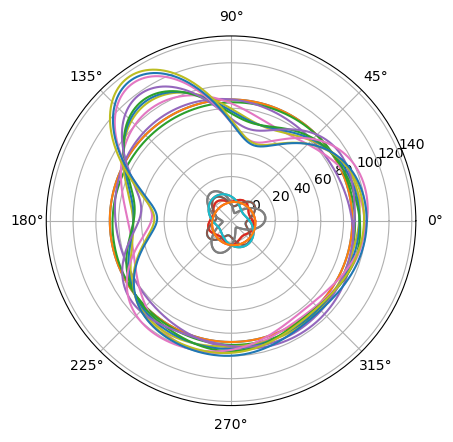

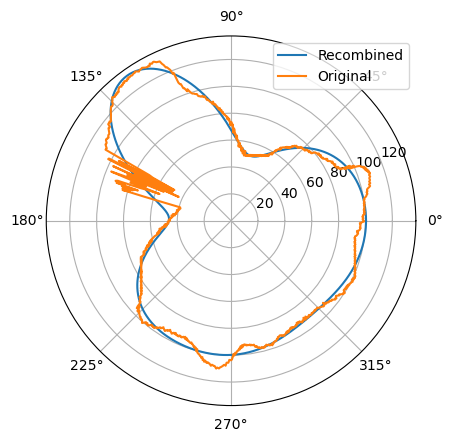

(array([0.        , 0.00628319, 0.01256637, 0.01884956, 0.02513274,
        0.03141593, 0.03769911, 0.0439823 , 0.05026548, 0.05654867,
        0.06283185, 0.06911504, 0.07539822, 0.08168141, 0.08796459,
        0.09424778, 0.10053096, 0.10681415, 0.11309734, 0.11938052,
        0.12566371, 0.13194689, 0.13823008, 0.14451326, 0.15079645,
        0.15707963, 0.16336282, 0.169646  , 0.17592919, 0.18221237,
        0.18849556, 0.19477874, 0.20106193, 0.20734512, 0.2136283 ,
        0.21991149, 0.22619467, 0.23247786, 0.23876104, 0.24504423,
        0.25132741, 0.2576106 , 0.26389378, 0.27017697, 0.27646015,
        0.28274334, 0.28902652, 0.29530971, 0.30159289, 0.30787608,
        0.31415927, 0.32044245, 0.32672564, 0.33300882, 0.33929201,
        0.34557519, 0.35185838, 0.35814156, 0.36442475, 0.37070793,
        0.37699112, 0.3832743 , 0.38955749, 0.39584067, 0.40212386,
        0.40840704, 0.41469023, 0.42097342, 0.4272566 , 0.43353979,
        0.43982297, 0.44610616, 0.45238934, 0.45

In [118]:
img = img = Image.open('image017.jpg')
img = np.array(img)
img = np.flip(img, axis=(0,1))
master_particle_fft(img, 2, 180)
